In [1]:
%matplotlib notebook

import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import torch.nn as nn
import torch.optim as optim

from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


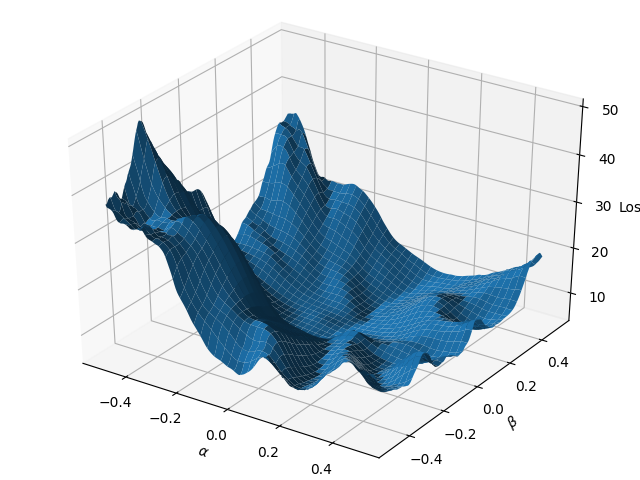

Text(0.5, 0, 'Loss')

In [2]:
PHYSICS_MODEL = "xy"
SYMM_TYPE = "no_symm"
N = 10
MAX_CHANGE = 0.50

NH = 100
LR = 0.001
EP = 2000
SEED = 1
DIM = 201

NICE_NAMES_DICT = {"xy": "XY Model", "tfim": "TFIM"}

model_name = "{0}_{1}".format(PHYSICS_MODEL, SYMM_TYPE)
results_folder = "results/{0}_results".format(model_name)
study_name = "N{0}_nh{1}_lr{2}_ep{3}".format(N, NH, LR, EP)

# Define the intervals which alpha, beta will take
alpha_min, alpha_max = -MAX_CHANGE, MAX_CHANGE
beta_min, beta_max = -MAX_CHANGE, MAX_CHANGE

alpha_vals = np.linspace(alpha_min, alpha_max, DIM)
beta_vals = np.linspace(beta_min, beta_max, DIM)
grid_alphas, grid_betas = np.meshgrid(alpha_vals, beta_vals)

landscape_file = "loss_landscape_range{0}_dim{1}_{2}_{3}_seed{4}.txt".format(
    MAX_CHANGE, DIM, model_name, study_name, SEED
)
loss_data = np.loadtxt("{0}/{1}/{2}".format(results_folder, study_name, landscape_file))

fig = plt.figure()
ax = Axes3D(fig)

ax.plot_surface(grid_alphas, grid_betas, loss_data)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$\beta$")
ax.set_zlabel(r"Loss")

<IPython.core.display.Javascript object>


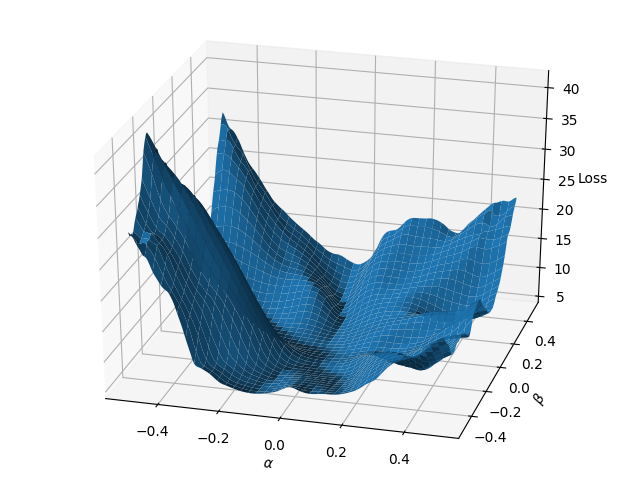

Text(0.5, 0, 'Loss')

In [3]:
PHYSICS_MODEL = "xy"
SYMM_TYPE = "hard_symm"
N = 10
MAX_CHANGE = 0.50

NH = 100
LR = 0.001
EP = 2000
SEED = 1
DIM = 201

NICE_NAMES_DICT = {"xy": "XY Model", "tfim": "TFIM"}

model_name = "{0}_{1}".format(PHYSICS_MODEL, SYMM_TYPE)
results_folder = "results/{0}_results".format(model_name)
study_name = "N{0}_nh{1}_lr{2}_ep{3}".format(N, NH, LR, EP)

# Define the intervals which alpha, beta will take
alpha_min, alpha_max = -MAX_CHANGE, MAX_CHANGE
beta_min, beta_max = -MAX_CHANGE, MAX_CHANGE

alpha_vals = np.linspace(alpha_min, alpha_max, DIM)
beta_vals = np.linspace(beta_min, beta_max, DIM)
grid_alphas, grid_betas = np.meshgrid(alpha_vals, beta_vals)

landscape_file = "loss_landscape_range{0}_dim{1}_{2}_{3}_seed{4}.txt".format(
    MAX_CHANGE, DIM, model_name, study_name, SEED
)
loss_data = np.loadtxt("{0}/{1}/{2}".format(results_folder, study_name, landscape_file))

fig = plt.figure()
ax = Axes3D(fig)

ax.plot_surface(grid_alphas, grid_betas, loss_data)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$\beta$")
ax.set_zlabel(r"Loss")

<IPython.core.display.Javascript object>


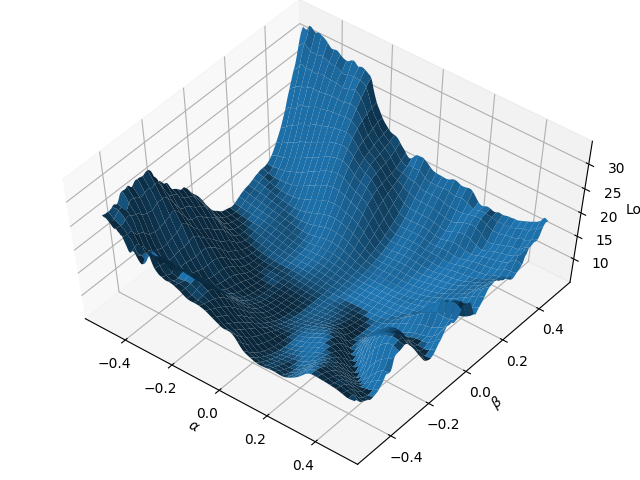

Text(0.5, 0, 'Loss')

In [4]:
PHYSICS_MODEL = "tfim"
SYMM_TYPE = "no_symm"
N = 10
MAX_CHANGE = 0.50

NH = 100
LR = 0.001
EP = 2000
SEED = 1
DIM = 201

NICE_NAMES_DICT = {"xy": "XY Model", "tfim": "TFIM"}

model_name = "{0}_{1}".format(PHYSICS_MODEL, SYMM_TYPE)
results_folder = "results/{0}_results".format(model_name)
study_name = "N{0}_nh{1}_lr{2}_ep{3}".format(N, NH, LR, EP)

# Define the intervals which alpha, beta will take
alpha_min, alpha_max = -MAX_CHANGE, MAX_CHANGE
beta_min, beta_max = -MAX_CHANGE, MAX_CHANGE

alpha_vals = np.linspace(alpha_min, alpha_max, DIM)
beta_vals = np.linspace(beta_min, beta_max, DIM)
grid_alphas, grid_betas = np.meshgrid(alpha_vals, beta_vals)

landscape_file = "loss_landscape_range{0}_dim{1}_{2}_{3}_seed{4}.txt".format(
    MAX_CHANGE, DIM, model_name, study_name, SEED
)
loss_data = np.loadtxt("{0}/{1}/{2}".format(results_folder, study_name, landscape_file))

fig = plt.figure()
ax = Axes3D(fig)

ax.plot_surface(grid_alphas, grid_betas, loss_data)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$\beta$")
ax.set_zlabel(r"Loss")

def init():
    ax.plot_surface(
        grid_alphas, grid_betas, loss_data, cmap="jet", linewidth=0, antialiased=False
    )
    return fig,


def animate(i):
    ax.view_init(elev=15, azim=i * 4)
    return fig,

# plt.axis("off")

anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=90, interval=50, blit=True
)

movie_name = "gif_loss_landscape_3d_range{0}_dim{1}_{2}_{3}_seed{4}.gif".format(
    MAX_CHANGE, DIM, model_name, study_name, SEED
)

where_to_save = "{0}/{1}/{2}".format(results_folder, study_name, movie_name)

anim.save(where_to_save, writer="imagemagick", fps=1000 / 50)